In [32]:
# bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install factor_analyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42622 sha256=81668ad747a8655557ee84ecb5f3b1621f53a8ddc00fa29281230589c6a48eba
  Stored in directory: /home/escova/.cache/pip/wheels/a2/af/06/f4d4ed4d9d714fda437fb1583629417319603c2266e7b233cc
Successfully built factor_analyzer


In [2]:
# leitura dos dados
df = pd.read_csv('../data/distritos_sp.csv')
df.head()

,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
0,1,Água Rasa,1961,34.619999,7.6,32,13.86,-1.840000,52.980000,0.00,125.610001
1,12,Alto de Pinheiros,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001
2,23,Anhanguera,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000
3,34,Aricanduva,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993
4,45,Artur Alvim,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994


## Explorando dados

In [3]:
# atributos
df.columns

Index(['cod_ibge', 'distritos', 'renda', 'quota', 'escolaridade', 'idade',
       'mortalidade', 'txcresc', 'causasext', 'favel', 'denspop'],
      dtype='object')

In [4]:
# linhas e colunas
df.shape

(96, 11)

In [5]:
# informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cod_ibge      96 non-null     int64  
 1   distritos     96 non-null     object 
 2   renda         96 non-null     int64  
 3   quota         96 non-null     float64
 4   escolaridade  96 non-null     float64
 5   idade         96 non-null     int64  
 6   mortalidade   96 non-null     float64
 7   txcresc       96 non-null     float64
 8   causasext     96 non-null     float64
 9   favel         96 non-null     float64
 10  denspop       96 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 8.4+ KB


In [14]:
# dados nulos
df.isnull().sum()

cod_ibge        0
distritos       0
renda           0
quota           0
escolaridade    0
idade           0
mortalidade     0
txcresc         0
causasext       0
favel           0
denspop         0
dtype: int64

In [12]:
# atributo distritos
np.unique(df['distritos'], return_counts=True)

(array(['Alto de Pinheiros', 'Anhanguera', 'Aricanduva', 'Artur Alvim',
        'Barra Funda', 'Bela Vista', 'Belém', 'Bom Retiro', 'Brasilândia',
        'Brás', 'Butantã', 'Cachoeirinha', 'Cambuci', 'Campo Belo',
        'Campo Grande', 'Campo Limpo', 'Cangaíba', 'Capão Redondo',
        'Carrão', 'Casa Verde', 'Cidade Ademar', 'Cidade Dutra',
        'Cidade Lider', 'Cidade Tiradentes', 'Consolação', 'Cursino',
        'Ermelino Matarazzo', 'Freguesia do Ó', 'Grajaú', 'Guaianases',
        'Iguatemi', 'Ipiranga', 'Itaim Bibi', 'Itaim Paulista', 'Itaquera',
        'Jabaquara', 'Jaguara', 'Jaguaré', 'Jaraguá', 'Jardim Helena',
        'Jardim Paulista', 'Jardim São Luís', 'Jardim Ângela', 'Jaçanã',
        'José Bonifácio', 'Lajeado', 'Lapa', 'Liberdade', 'Limão',
        'Mandaqui', 'Marsilac', 'Moema', 'Mooca', 'Morumbi', 'Parelheiros',
        'Pari', 'Parque do Carmo', 'Pedreira', 'Penha', 'Perdizes',
        'Perus', 'Pinheiros', 'Pirituba', 'Ponte Rasa', 'Raposo Tavares',
     

In [24]:
# descritivas
df.drop(['cod_ibge'], axis=1).describe()

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,1856.218750,30.478021,7.075000,27.395833,15.992812,0.041146,71.086667,5.932187,99.860104
std,970.774441,23.040243,1.008908,4.385332,4.994409,3.509652,23.315169,7.883762,49.606814
min,159.000000,0.610000,4.800000,20.000000,6.460000,-6.240000,22.680000,0.000000,0.370000
25%,1150.000000,12.400000,6.300000,23.000000,12.960000,-2.042500,56.417499,0.000000,64.317497
50%,1628.000000,24.304999,7.000000,27.000000,16.230000,-0.835000,70.395000,3.015000,96.165001
75%,2315.500000,40.989999,7.850000,31.000000,18.720001,1.342500,82.370001,7.837500,136.222500
max,5146.000000,104.730003,9.200000,36.000000,44.250000,18.120001,127.370003,45.689999,249.600006


array([[<Axes: title={'center': 'renda'}>,
        <Axes: title={'center': 'quota'}>,
        <Axes: title={'center': 'escolaridade'}>],
       [<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'mortalidade'}>,
        <Axes: title={'center': 'txcresc'}>],
       [<Axes: title={'center': 'causasext'}>,
        <Axes: title={'center': 'favel'}>,
        <Axes: title={'center': 'denspop'}>]], dtype=object)

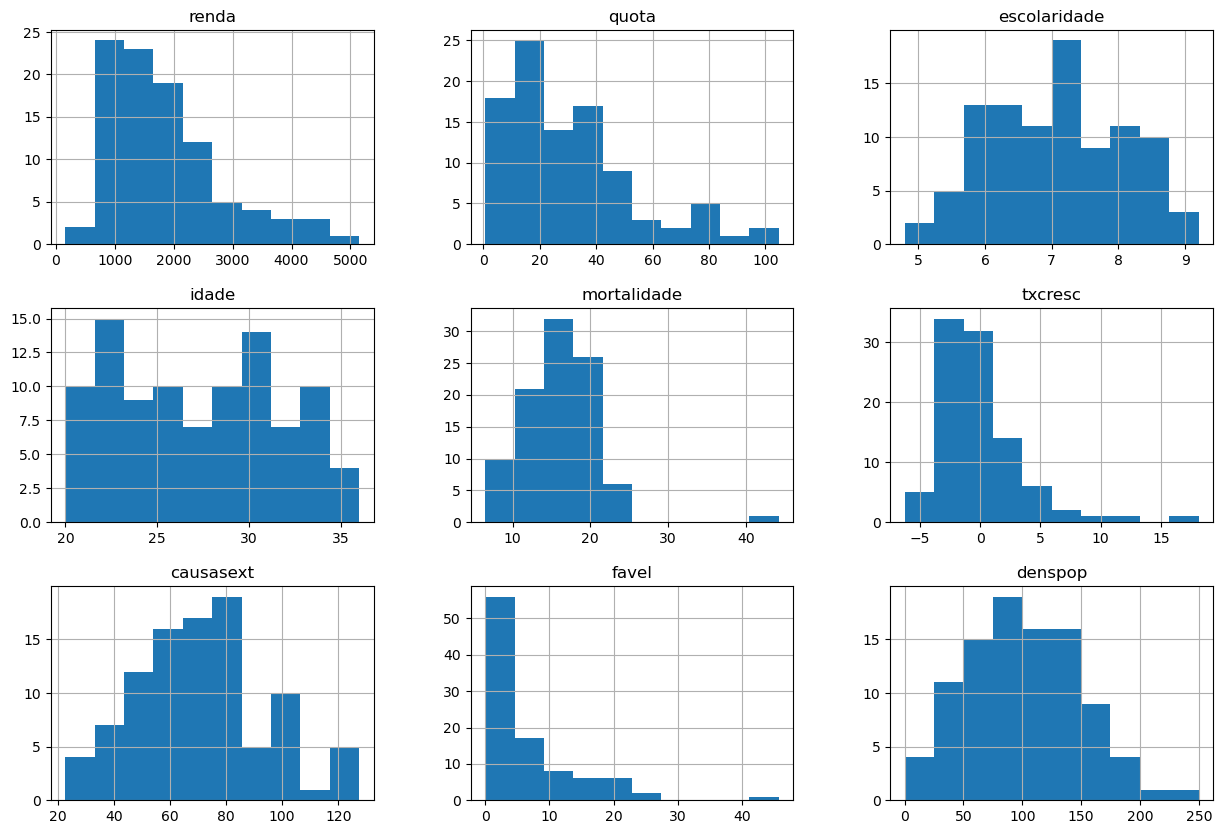

In [25]:
# distribuição
df.drop('cod_ibge', axis=1).hist(figsize=(15,10))

<Axes: >

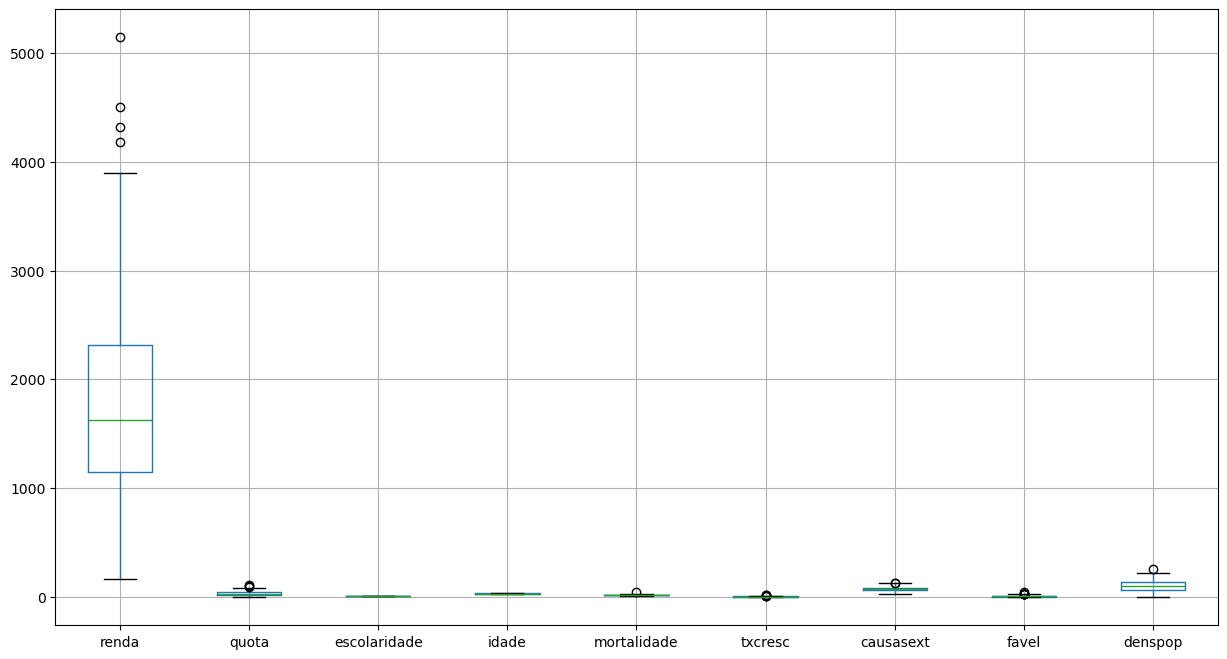

In [27]:
# outliers
df.drop('cod_ibge', axis=1).boxplot(figsize=(15,8))

In [28]:
# correlacoes
df.drop(['cod_ibge', 'distritos'], axis=1).corr()

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
renda,1.000000,0.920099,0.777332,0.732307,-0.519585,-0.424711,-0.462516,-0.146957,-0.019711
quota,0.920099,1.000000,0.850455,0.832737,-0.520282,-0.554767,-0.491020,-0.243010,0.057374
escolaridade,0.777332,0.850455,1.000000,0.955825,-0.582601,-0.692968,-0.606621,-0.432548,0.157673
idade,0.732307,0.832737,0.955825,1.000000,-0.553758,-0.703237,-0.615073,-0.499838,0.141469
mortalidade,-0.519585,-0.520282,-0.582601,-0.553758,1.000000,0.346049,0.422790,0.130877,-0.093018
txcresc,-0.424711,-0.554767,-0.692968,-0.703237,0.346049,1.000000,0.234472,0.281853,-0.279084
causasext,-0.462516,-0.491020,-0.606621,-0.615073,0.422790,0.234472,1.000000,0.404447,-0.045281
favel,-0.146957,-0.243010,-0.432548,-0.499838,0.130877,0.281853,0.404447,1.000000,-0.106481
denspop,-0.019711,0.057374,0.157673,0.141469,-0.093018,-0.279084,-0.045281,-0.106481,1.000000


<Axes: >

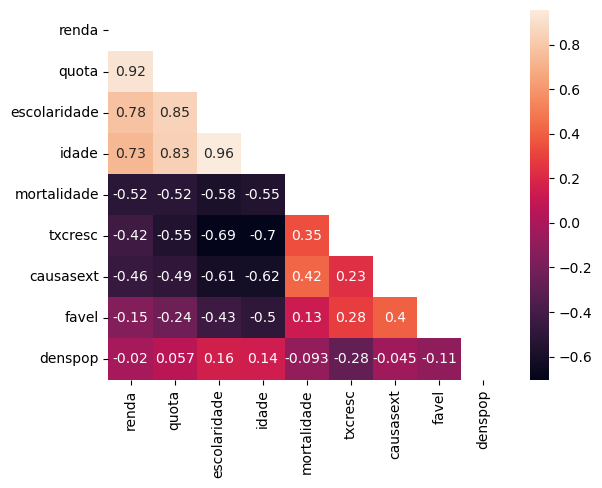

In [31]:
mask = np.triu(np.ones_like(df.drop(['cod_ibge', 'distritos'], axis=1).corr(), dtype=bool))
sns.heatmap(df.drop(['cod_ibge', 'distritos'], axis=1).corr(), annot=True, mask=mask)

In [33]:
# estatistica KMO
kmo_variaveis, kmo = calculate_kmo(df.drop(['cod_ibge', 'distritos'], axis=1))
kmo_variaveis, kmo

(array([0.77821831, 0.81941916, 0.8560973 , 0.81750459, 0.94677797,
        0.84146713, 0.89083164, 0.78871213, 0.63275248]),
 0.833091424182929)

In [35]:
# estatistica Bartlett
qui_quadrado, pvalor = calculate_bartlett_sphericity(df.drop(['cod_ibge', 'distritos'], axis=1))
qui_quadrado, pvalor, pvalor < 0.05

(748.1593126421548, 5.607017481838534e-134, True)